**PCS5031 - Introdução à Ciência dos Dados (2017)**

**Extração de conhecimento sobre a indústria de filmes**

EQUIPE:

* Jacqueline Sant Eufemia David
* Maritza Maura de Carvalho Francisco
* Rosangela de Fátima Pereira Marquesone


**Importando as bibliotecas necessárias**

In [1]:
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Carregando as bases de dados do dataset movielens**

In [2]:
filmes = pd.read_csv('amostra/movies.csv')
ratings = pd.read_csv('amostra/ratings.csv')
links = pd.read_csv('amostra/links.csv')
tags = pd.read_csv('amostra/tags.csv')

In [3]:
#visualizando a quantidade de registros e de atributos
filmes.shape

(9125, 3)

In [6]:
#junção das bases filmes e ratings
filmes_ratings = pd.merge(filmes, ratings, on='movieId', how='inner') 

In [8]:
filmes_ratings.shape

(100004, 6)

In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**Algoritmo apriori - Market Basket Analysis**

In [12]:
import csv
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [13]:
#criação de matriz de filmes por usuários
basket = (ratings
          .groupby(['userId', 'movieId'])['rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('userId'))

In [14]:
basket.shape

(671, 9066)

In [23]:
#divisão da base de dados entre treinamento (50%) e teste (50%)
from sklearn.model_selection import train_test_split

basket_train, basket_test = train_test_split(basket, test_size=0.5)

In [24]:
basket_train.shape

(335, 9066)

In [25]:
basket_test.shape

(336, 9066)

In [26]:
basket_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
408,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,4.0,0.0,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Função para transformar a matriz, contendo apenas valores binários.
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_train = basket_train.applymap(encode_units)

**EXECUÇÃO DO ALGORITMO APRIORI COM SUPORTE DE 0.1**

In [30]:
#chamada da função apriori, da biblioteca MLxtend
frequent_itemsets_train = apriori(basket_sets_train, min_support=0.1, use_colnames=True)

In [33]:
frequent_itemsets_train.shape

(11553, 2)

In [34]:
#execução da função responsável por gerar as regras de associação
rules_train = association_rules(frequent_itemsets_train, metric="lift", min_threshold=1)
rules_train

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1210, 2571)",(4886),0.208955,0.176119,0.101493,0.485714,2.757869,0.064691,1.601990
1,"(1210, 4886)",(2571),0.107463,0.376119,0.101493,0.944444,2.511023,0.061074,11.229851
2,"(2571, 4886)",(1210),0.143284,0.319403,0.101493,0.708333,2.217679,0.055727,2.333475
3,(1210),"(2571, 4886)",0.319403,0.143284,0.101493,0.317757,2.217679,0.055727,1.255735
4,(2571),"(1210, 4886)",0.376119,0.107463,0.101493,0.269841,2.511023,0.061074,1.222388
5,(4886),"(1210, 2571)",0.176119,0.208955,0.101493,0.576271,2.757869,0.064691,1.866866
6,"(296, 457, 590)",(47),0.188060,0.292537,0.119403,0.634921,2.170392,0.064389,1.937833
7,"(296, 457, 47)",(590),0.167164,0.310448,0.119403,0.714286,2.300824,0.067507,2.413433
8,"(296, 590, 47)",(457),0.137313,0.346269,0.119403,0.869565,2.511244,0.071856,5.011940
9,"(457, 590, 47)",(296),0.134328,0.465672,0.119403,0.888889,1.908832,0.056850,4.808955


In [35]:
#criação de uma coluna contendo a quantidade de valores para cada consequente
rules_train['length'] = rules_train['consequents'].apply(lambda x: len(x))
rules_train.head(20)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(1210, 2571)",(4886),0.208955,0.176119,0.101493,0.485714,2.757869,0.064691,1.601990,1
1,"(1210, 4886)",(2571),0.107463,0.376119,0.101493,0.944444,2.511023,0.061074,11.229851,1
2,"(2571, 4886)",(1210),0.143284,0.319403,0.101493,0.708333,2.217679,0.055727,2.333475,1
3,(1210),"(2571, 4886)",0.319403,0.143284,0.101493,0.317757,2.217679,0.055727,1.255735,2
4,(2571),"(1210, 4886)",0.376119,0.107463,0.101493,0.269841,2.511023,0.061074,1.222388,2
5,(4886),"(1210, 2571)",0.176119,0.208955,0.101493,0.576271,2.757869,0.064691,1.866866,2
6,"(296, 457, 590)",(47),0.188060,0.292537,0.119403,0.634921,2.170392,0.064389,1.937833,1
7,"(296, 457, 47)",(590),0.167164,0.310448,0.119403,0.714286,2.300824,0.067507,2.413433,1
8,"(296, 590, 47)",(457),0.137313,0.346269,0.119403,0.869565,2.511244,0.071856,5.011940,1
9,"(457, 590, 47)",(296),0.134328,0.465672,0.119403,0.888889,1.908832,0.056850,4.808955,1


In [36]:
#filtragem de regras, selecionanando apenas as que possuem consequência de tamanho 1
rules_filter_train = rules_train[ (rules_train['length'] == 1)]
rules_filter_train

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(1210, 2571)",(4886),0.208955,0.176119,0.101493,0.485714,2.757869,0.064691,1.601990,1
1,"(1210, 4886)",(2571),0.107463,0.376119,0.101493,0.944444,2.511023,0.061074,11.229851,1
2,"(2571, 4886)",(1210),0.143284,0.319403,0.101493,0.708333,2.217679,0.055727,2.333475,1
6,"(296, 457, 590)",(47),0.188060,0.292537,0.119403,0.634921,2.170392,0.064389,1.937833,1
7,"(296, 457, 47)",(590),0.167164,0.310448,0.119403,0.714286,2.300824,0.067507,2.413433,1
8,"(296, 590, 47)",(457),0.137313,0.346269,0.119403,0.869565,2.511244,0.071856,5.011940,1
9,"(457, 590, 47)",(296),0.134328,0.465672,0.119403,0.888889,1.908832,0.056850,4.808955,1
20,"(648, 457)",(590),0.164179,0.310448,0.113433,0.690909,2.225524,0.062464,2.230904,1
21,"(648, 590)",(457),0.134328,0.346269,0.113433,0.844444,2.438697,0.066919,4.202559,1
22,"(457, 590)",(648),0.229851,0.268657,0.113433,0.493506,1.836941,0.051682,1.443934,1


In [37]:
print(rules_filter_train.lift.min())

1.01876576176


In [38]:
print(rules_filter_train.lift.max())

5.59705159705


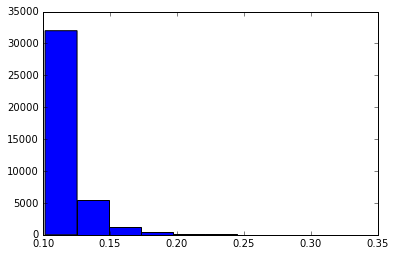

In [39]:
#análise exploratória das regras
import pylab

support = rules_filter_train['support']
lift = rules_filter_train['lift']

plt.hist(support)

plt.show()

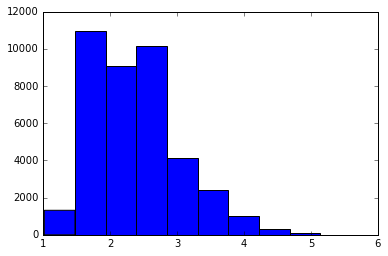

In [40]:
plt.hist(lift)

plt.show()

**EXECUÇÃO DO ALGORITMO APRIORI EM BASE DE TESTE**

In [41]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_test = basket_test.applymap(encode_units)

In [42]:
basket_sets_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
401,1,0,0.0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
238,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
384,0,0,0.0,0,0,0,0.0,0,0,1,...,0,0.0,0,0,0,0,0,0,0,0
600,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
227,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [43]:
frequent_itemsets_test = apriori(basket_sets_test, min_support=0.1, use_colnames=True)

In [49]:
frequent_itemsets_train.shape

(11553, 2)

In [50]:
frequent_itemsets_test.shape

(5307, 2)

In [51]:
rules_test = association_rules(frequent_itemsets_test, metric="lift", min_threshold=1)
rules_test

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(480, 590)",(318),0.223214,0.458333,0.157738,0.706667,1.541818,0.055432,1.846591
1,"(480, 318)",(590),0.232143,0.291667,0.157738,0.679487,2.329670,0.090030,2.210000
2,"(318, 590)",(480),0.202381,0.404762,0.157738,0.779412,1.925606,0.075822,2.698413
3,(480),"(318, 590)",0.404762,0.202381,0.157738,0.389706,1.925606,0.075822,1.306942
4,(590),"(480, 318)",0.291667,0.232143,0.157738,0.540816,2.329670,0.090030,1.672222
5,(318),"(480, 590)",0.458333,0.223214,0.157738,0.344156,1.541818,0.055432,1.184406
6,(590),(919),0.291667,0.178571,0.101190,0.346939,1.942857,0.049107,1.257812
7,(919),(590),0.178571,0.291667,0.101190,0.566667,1.942857,0.049107,1.634615
8,"(1036, 1, 356, 1270)",(1721),0.119048,0.247024,0.101190,0.850000,3.440964,0.071783,5.019841
9,"(1, 356, 1270, 1721)",(1036),0.133929,0.232143,0.101190,0.755556,3.254701,0.070100,3.141234


In [52]:
rules_test['length'] = rules_test['consequents'].apply(lambda x: len(x))
rules_test.head(5)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(480, 590)",(318),0.223214,0.458333,0.157738,0.706667,1.541818,0.055432,1.846591,1
1,"(480, 318)",(590),0.232143,0.291667,0.157738,0.679487,2.329670,0.090030,2.210000,1
2,"(318, 590)",(480),0.202381,0.404762,0.157738,0.779412,1.925606,0.075822,2.698413,1
3,(480),"(318, 590)",0.404762,0.202381,0.157738,0.389706,1.925606,0.075822,1.306942,2
4,(590),"(480, 318)",0.291667,0.232143,0.157738,0.540816,2.329670,0.090030,1.672222,2


In [53]:
rules_filter_test = rules_test[ (rules_test['length'] == 1)]
rules_filter_test

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(480, 590)",(318),0.223214,0.458333,0.157738,0.706667,1.541818,0.055432,1.846591,1
1,"(480, 318)",(590),0.232143,0.291667,0.157738,0.679487,2.329670,0.090030,2.210000,1
2,"(318, 590)",(480),0.202381,0.404762,0.157738,0.779412,1.925606,0.075822,2.698413,1
6,(590),(919),0.291667,0.178571,0.101190,0.346939,1.942857,0.049107,1.257812,1
7,(919),(590),0.178571,0.291667,0.101190,0.566667,1.942857,0.049107,1.634615,1
8,"(1036, 1, 356, 1270)",(1721),0.119048,0.247024,0.101190,0.850000,3.440964,0.071783,5.019841,1
9,"(1, 356, 1270, 1721)",(1036),0.133929,0.232143,0.101190,0.755556,3.254701,0.070100,3.141234,1
10,"(1, 356, 1036, 1721)",(1270),0.101190,0.345238,0.101190,1.000000,2.896552,0.066256,inf,1
11,"(1, 1036, 1270, 1721)",(356),0.104167,0.505952,0.101190,0.971429,1.920000,0.048487,17.291667,1
12,"(1036, 356, 1270, 1721)",(1),0.110119,0.380952,0.101190,0.918919,2.412162,0.059240,7.634921,1


In [54]:
print(rules_filter_test.lift.min())

1.13542282673


In [55]:
print(rules_filter_test.lift.max())

6.01263157895


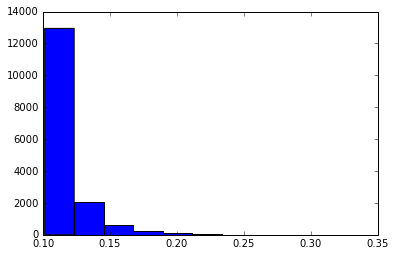

In [56]:
support_test = rules_filter_test['support']
lift_test = rules_filter_test['lift']

#plt.scatter(x,y)

plt.hist(support_test)

plt.show()

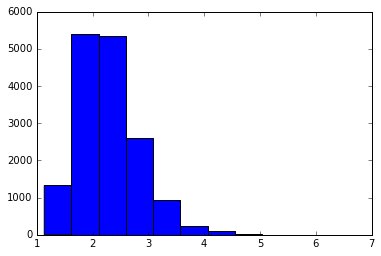

In [57]:
plt.hist(lift_test)

plt.show()

In [52]:
rules_filter_train.to_csv('rules_filter_train.csv', sep=';')
rules_filter_test.to_csv('rules_filter_test.csv', sep=';')

In [68]:
frequent_itemsets_train.shape

(11553, 2)

In [69]:
frequent_itemsets_test.shape

(5307, 2)

In [58]:
rules_filter_train.shape

(39387, 10)

In [59]:
rules_filter_test.shape

(16009, 10)

In [60]:
basket_sets_train.shape

(335, 9066)

In [61]:
basket_sets_test.shape

(336, 9066)

In [62]:
rules_filter_test.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(480, 590)",(318),0.223214,0.458333,0.157738,0.706667,1.541818,0.055432,1.846591,1
1,"(480, 318)",(590),0.232143,0.291667,0.157738,0.679487,2.329670,0.090030,2.210000,1
2,"(318, 590)",(480),0.202381,0.404762,0.157738,0.779412,1.925606,0.075822,2.698413,1
6,(590),(919),0.291667,0.178571,0.101190,0.346939,1.942857,0.049107,1.257812,1
7,(919),(590),0.178571,0.291667,0.101190,0.566667,1.942857,0.049107,1.634615,1


In [63]:
rules_filter_test.columns = ['antecedants', 'consequents', 'antecedent support_test', 'consequent support_test', 'support_test', 'confidence_test', 'lift_test', 'leverage_test', 'conviction_test', 'length_test']

In [64]:
rules_filter_test.head()

,antecedants,consequents,antecedent support_test,consequent support_test,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test
0,"(480, 590)",(318),0.223214,0.458333,0.157738,0.706667,1.541818,0.055432,1.846591,1
1,"(480, 318)",(590),0.232143,0.291667,0.157738,0.679487,2.329670,0.090030,2.210000,1
2,"(318, 590)",(480),0.202381,0.404762,0.157738,0.779412,1.925606,0.075822,2.698413,1
6,(590),(919),0.291667,0.178571,0.101190,0.346939,1.942857,0.049107,1.257812,1
7,(919),(590),0.178571,0.291667,0.101190,0.566667,1.942857,0.049107,1.634615,1


In [65]:
rules_filter_train.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(1210, 2571)",(4886),0.208955,0.176119,0.101493,0.485714,2.757869,0.064691,1.601990,1
1,"(1210, 4886)",(2571),0.107463,0.376119,0.101493,0.944444,2.511023,0.061074,11.229851,1
2,"(2571, 4886)",(1210),0.143284,0.319403,0.101493,0.708333,2.217679,0.055727,2.333475,1
6,"(296, 457, 590)",(47),0.188060,0.292537,0.119403,0.634921,2.170392,0.064389,1.937833,1
7,"(296, 457, 47)",(590),0.167164,0.310448,0.119403,0.714286,2.300824,0.067507,2.413433,1


In [66]:
comparison = pd.merge(rules_filter_train, rules_filter_test, on=['antecedants', 'consequents'], how='inner') 

In [70]:
comparison

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,antecedent support_test,consequent support_test,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,0.226190,0.458333,0.148810,0.657895,1.435407,0.045139,1.583333,1
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,0.226190,0.395833,0.148810,0.657895,1.662050,0.059276,1.766026,1
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,0.235119,0.380952,0.148810,0.632911,1.661392,0.059240,1.686371,1
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,0.184524,0.360119,0.125000,0.677419,1.881098,0.058549,1.983631,1
4,(589),(539),0.346269,0.188060,0.128358,0.370690,1.971128,0.063239,1.290207,1,0.360119,0.184524,0.125000,0.347107,1.881098,0.058549,1.249020,1
5,"(1, 356)",(1197),0.244776,0.241791,0.122388,0.500000,2.067901,0.063203,1.516418,1,0.279762,0.244048,0.122024,0.436170,1.787234,0.053749,1.340746,1
6,"(1, 1197)",(356),0.143284,0.510448,0.122388,0.854167,1.673367,0.049249,3.356930,1,0.136905,0.505952,0.122024,0.891304,1.761637,0.052757,4.545238,1
7,"(356, 1197)",(1),0.170149,0.355224,0.122388,0.719298,2.024915,0.061947,2.297015,1,0.169643,0.380952,0.122024,0.719298,1.888158,0.057398,2.205357,1
8,"(356, 150, 590)",(597),0.161194,0.235821,0.125373,0.777778,3.298172,0.087360,3.438806,1,0.175595,0.202381,0.107143,0.610169,3.014955,0.071606,2.046066,1
9,"(356, 597, 590)",(150),0.170149,0.307463,0.125373,0.736842,2.396525,0.073059,2.631642,1,0.139881,0.288690,0.107143,0.765957,2.653213,0.066761,3.039232,1


In [71]:
comparison.to_csv('merge_regras.csv', sep=';')

In [72]:
comparison.shape

(2692, 18)

In [147]:
comparison['length-ant'] = comparison['antecedants'].apply(lambda x: len(x))
comparison.head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,antecedent support_test,consequent support_test,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test,length-ant
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,0.226190,0.458333,0.148810,0.657895,1.435407,0.045139,1.583333,1,2
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,0.226190,0.395833,0.148810,0.657895,1.662050,0.059276,1.766026,1,2
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,0.235119,0.380952,0.148810,0.632911,1.661392,0.059240,1.686371,1,2
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,0.184524,0.360119,0.125000,0.677419,1.881098,0.058549,1.983631,1,1
4,(589),(539),0.346269,0.188060,0.128358,0.370690,1.971128,0.063239,1.290207,1,0.360119,0.184524,0.125000,0.347107,1.881098,0.058549,1.249020,1,1
5,"(1, 356)",(1197),0.244776,0.241791,0.122388,0.500000,2.067901,0.063203,1.516418,1,0.279762,0.244048,0.122024,0.436170,1.787234,0.053749,1.340746,1,2
6,"(1, 1197)",(356),0.143284,0.510448,0.122388,0.854167,1.673367,0.049249,3.356930,1,0.136905,0.505952,0.122024,0.891304,1.761637,0.052757,4.545238,1,2
7,"(356, 1197)",(1),0.170149,0.355224,0.122388,0.719298,2.024915,0.061947,2.297015,1,0.169643,0.380952,0.122024,0.719298,1.888158,0.057398,2.205357,1,2
8,"(356, 150, 590)",(597),0.161194,0.235821,0.125373,0.777778,3.298172,0.087360,3.438806,1,0.175595,0.202381,0.107143,0.610169,3.014955,0.071606,2.046066,1,3
9,"(356, 597, 590)",(150),0.170149,0.307463,0.125373,0.736842,2.396525,0.073059,2.631642,1,0.139881,0.288690,0.107143,0.765957,2.653213,0.066761,3.039232,1,3


In [148]:
comparison.to_csv('merge_regras-v2.csv', sep=';')

In [223]:
def get_movie_name_cons(index):
    return filmes.title[list(index)].values

t1 = []
for row in comparison.consequents.values:
    if(row == frozenset([79132L])):
        t1.append(['Jumanji (1995)', 'Pal Joey (1957)'])
    else:
        #print get_movie_name_cons(row)
        t1.append(get_movie_name_cons(row))

comparison.loc[:,'nome-consequents'] = t1
comparison.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,...,consequent support_test,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test,length-ant,antecedants-name,nome-consequents
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,...,0.458333,0.14881,0.657895,1.435407,0.045139,1.583333,1,2,"[Jumanji (1995), Pal Joey (1957)]","[Crow, The (1994)]"
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,...,0.395833,0.14881,0.657895,1.662050,0.059276,1.766026,1,2,"[Jumanji (1995), Crow, The (1994)]",[Pal Joey (1957)]
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,...,0.380952,0.14881,0.632911,1.661392,0.059240,1.686371,1,2,"[Pal Joey (1957), Crow, The (1994)]",[Jumanji (1995)]
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,...,0.360119,0.12500,0.677419,1.881098,0.058549,1.983631,1,1,"[Pallbearer, The (1996)]",[True Crime (1996)]
4,(589),(539),0.346269,0.188060,0.128358,0.370690,1.971128,0.063239,1.290207,1,...,0.184524,0.12500,0.347107,1.881098,0.058549,1.249020,1,1,[True Crime (1996)],"[Pallbearer, The (1996)]"


In [228]:
def get_movie_name_ant(index):
    return filmes.title[list(index)].values

t3 = []
for row in comparison.antecedants.values:
    if(row == frozenset([79132L])):
        t3.append(['Jumanji (1995)', 'Pal Joey (1957)'])
    else:
        t3.append(get_movie_name_ant(row))


In [220]:
comparison.loc[:,'antecedants-name'] = t3

In [221]:
comparison.head(5)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,antecedent support_test,consequent support_test,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test,length-ant,antecedants-name
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,0.226190,0.458333,0.14881,0.657895,1.435407,0.045139,1.583333,1,2,"[Jumanji (1995), Pal Joey (1957)]"
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,0.226190,0.395833,0.14881,0.657895,1.662050,0.059276,1.766026,1,2,"[Jumanji (1995), Crow, The (1994)]"
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,0.235119,0.380952,0.14881,0.632911,1.661392,0.059240,1.686371,1,2,"[Pal Joey (1957), Crow, The (1994)]"
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,0.184524,0.360119,0.12500,0.677419,1.881098,0.058549,1.983631,1,1,"[Pallbearer, The (1996)]"
4,(589),(539),0.346269,0.188060,0.128358,0.370690,1.971128,0.063239,1.290207,1,0.360119,0.184524,0.12500,0.347107,1.881098,0.058549,1.249020,1,1,[True Crime (1996)]


In [225]:
comparison.to_csv('merge_regras-v3.csv', sep=';')

In [226]:
frequent_itemsets_train.to_csv('frequent-train5050.csv', sep=';')

In [227]:
frequent_itemsets_test.to_csv('frequent-test5050.csv', sep=';')

In [229]:
%hist -f my_history.py

In [220]:
#import dill
#dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')

In [3]:
comparison.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,...,consequent support_test,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test,length-ant,antecedants-name,nome-consequents
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,...,0.458333,0.14881,0.657895,1.435407,0.045139,1.583333,1,2,"[Jumanji (1995), Pal Joey (1957)]","[Crow, The (1994)]"
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,...,0.395833,0.14881,0.657895,1.662050,0.059276,1.766026,1,2,"[Jumanji (1995), Crow, The (1994)]",[Pal Joey (1957)]
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,...,0.380952,0.14881,0.632911,1.661392,0.059240,1.686371,1,2,"[Pal Joey (1957), Crow, The (1994)]",[Jumanji (1995)]
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,...,0.360119,0.12500,0.677419,1.881098,0.058549,1.983631,1,1,"[Pallbearer, The (1996)]",[True Crime (1996)]
4,(589),(539),0.346269,0.188060,0.128358,0.370690,1.971128,0.063239,1.290207,1,...,0.184524,0.12500,0.347107,1.881098,0.058549,1.249020,1,1,[True Crime (1996)],"[Pallbearer, The (1996)]"


In [33]:
medias = (filmes_ratings.groupby('movieId'))['movieId','rating'].mean().round(2)

In [34]:
medias.head()

,movieId,rating
movieId,,
1,1,3.87
2,2,3.40
3,3,3.16
4,4,2.38
5,5,3.27


In [61]:
comparison_filter_rating = comparison[(comparison['mean-rating'] >= 3.5)]
comparison_filter_rating

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,...,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test,length-ant,antecedants-name,nome-consequents,mean-rating
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,...,0.148810,0.657895,1.435407,0.045139,1.583333,1,2,"[Jumanji (1995), Pal Joey (1957)]","[Crow, The (1994)]",4.49
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,...,0.148810,0.657895,1.662050,0.059276,1.766026,1,2,"[Jumanji (1995), Crow, The (1994)]",[Pal Joey (1957)],4.18
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,...,0.148810,0.632911,1.661392,0.059240,1.686371,1,2,"[Pal Joey (1957), Crow, The (1994)]",[Jumanji (1995)],3.87
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,...,0.125000,0.677419,1.881098,0.058549,1.983631,1,1,"[Pallbearer, The (1996)]",[True Crime (1996)],4.01
5,"(1, 356)",(1197),0.244776,0.241791,0.122388,0.500000,2.067901,0.063203,1.516418,1,...,0.122024,0.436170,1.787234,0.053749,1.340746,1,2,"[Jumanji (1995), Mirage (1995)]",[Crash (1996)],4.21
6,"(1, 1197)",(356),0.143284,0.510448,0.122388,0.854167,1.673367,0.049249,3.356930,1,...,0.122024,0.891304,1.761637,0.052757,4.545238,1,2,"[Jumanji (1995), Crash (1996)]",[Mirage (1995)],4.05
7,"(356, 1197)",(1),0.170149,0.355224,0.122388,0.719298,2.024915,0.061947,2.297015,1,...,0.122024,0.719298,1.888158,0.057398,2.205357,1,2,"[Mirage (1995), Crash (1996)]",[Jumanji (1995)],3.87
9,"(356, 597, 590)",(150),0.170149,0.307463,0.125373,0.736842,2.396525,0.073059,2.631642,1,...,0.107143,0.765957,2.653213,0.066761,3.039232,1,3,"[Mirage (1995), Cosi (1996), Butterfly Kiss (1...",[Jeffrey (1995)],3.90
10,"(356, 597, 150)",(590),0.140299,0.310448,0.125373,0.893617,2.878478,0.081818,6.481791,1,...,0.107143,0.818182,2.805195,0.068948,3.895833,1,3,"[Mirage (1995), Cosi (1996), Jeffrey (1995)]",[Butterfly Kiss (1995)],3.72
11,"(590, 150, 597)",(356),0.128358,0.510448,0.125373,0.976744,1.913505,0.059853,21.050746,1,...,0.107143,0.972973,1.923052,0.051428,18.279762,1,3,"[Jeffrey (1995), Butterfly Kiss (1995), Cosi (...",[Mirage (1995)],4.05


In [62]:
comparison.shape

(2692, 22)

In [63]:
comparison_filter_rating.shape

(2309, 22)

In [56]:
comparison['mean-rating'].min()

3.3300000000000001

In [64]:
qtd = comparison_filter_rating['consequents'].unique()

In [65]:
qtd.shape

(61L,)

In [183]:
#(x>1) | (x<=1)
tf = ratings.userId[(filmes_ratings['title'] == 'Mirage (1995)') & (filmes_ratings['title'] == 'Mirage (1995)') & (filmes_ratings['title'] != 'Titanic (1953)')]

In [184]:
tf.shape

(1L,)

In [188]:
tf = filmes_ratings.userId[(filmes_ratings['title'] == 'Jumanji (1995)') & (filmes_ratings['title'] != 'Titanic (1953)')]

In [189]:
tf.shape

(107L,)

In [190]:
comparison_filter_rating.shape

(2309, 22)

In [192]:
comparison_filter_rating.lift.describe()

count    2309.000000
mean        2.009432
std         0.518014
min         1.018766
25%         1.624590
50%         1.867038
75%         2.355206
max         4.407895
Name: lift, dtype: float64

In [217]:
y = comparison_filter_rating['lift']

#plt.scatter(x,y)

plt.hist(y, color='#0489B1')
plt.xlabel('lift')

plt.show()

In [194]:
comparison_filter_rating.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length,...,support_test,confidence_test,lift_test,leverage_test,conviction_test,length_test,length-ant,antecedants-name,nome-consequents,mean-rating
0,"(1, 2571)",(318),0.191045,0.468657,0.134328,0.703125,1.500299,0.044794,1.789788,1,...,0.148810,0.657895,1.435407,0.045139,1.583333,1,2,"[Jumanji (1995), Pal Joey (1957)]","[Crow, The (1994)]",4.49
1,"(1, 318)",(2571),0.208955,0.376119,0.134328,0.642857,1.709184,0.055736,1.746866,1,...,0.148810,0.657895,1.662050,0.059276,1.766026,1,2,"[Jumanji (1995), Crow, The (1994)]",[Pal Joey (1957)],4.18
2,"(2571, 318)",(1),0.232836,0.355224,0.134328,0.576923,1.624111,0.051620,1.524016,1,...,0.148810,0.632911,1.661392,0.059240,1.686371,1,2,"[Pal Joey (1957), Crow, The (1994)]",[Jumanji (1995)],3.87
3,(539),(589),0.188060,0.346269,0.128358,0.682540,1.971128,0.063239,2.059254,1,...,0.125000,0.677419,1.881098,0.058549,1.983631,1,1,"[Pallbearer, The (1996)]",[True Crime (1996)],4.01
5,"(1, 356)",(1197),0.244776,0.241791,0.122388,0.500000,2.067901,0.063203,1.516418,1,...,0.122024,0.436170,1.787234,0.053749,1.340746,1,2,"[Jumanji (1995), Mirage (1995)]",[Crash (1996)],4.21


In [216]:
z = comparison_filter_rating['mean-rating']
#a = comparison_filter_rating['mean-rating']

#plt.scatter(z, a)

plt.hist(z, color='#0489B1')
plt.xlabel('media de avaliacoes')

plt.show()

In [201]:
filmes_results2=pd.pivot_table(filmes_ratings, values='rating', index=['movieId','title'], aggfunc=[len,np.mean,np.std])
filmes_results2.head()

,,len,mean,std
,,rating,rating,rating
movieId,title,,,
1,Toy Story (1995),247.0,3.872470,0.958981
2,Jumanji (1995),107.0,3.401869,0.880714
3,Grumpier Old Men (1995),59.0,3.161017,1.150115
4,Waiting to Exhale (1995),13.0,2.384615,0.938835
5,Father of the Bride Part II (1995),56.0,3.267857,0.948512


In [218]:
f = filmes_results2.sort_values([('std', 'rating')], ascending=False)
f

,,len,mean,std
,,rating,rating,rating
movieId,title,,,
27178,In July (Im Juli) (2000),2.0,2.750000,3.181981
2483,"Day of the Beast, The (Día de la Bestia, El) (1995)",2.0,2.750000,3.181981
6219,"Hunted, The (2003)",2.0,2.750000,3.181981
3718,American Pimp (1999),2.0,3.000000,2.828427
4404,Faust (1926),2.0,3.000000,2.828427
135436,The Secret Life of Pets (2016),2.0,3.000000,2.828427
66246,Numbskull Emptybrook (Uuno Turhapuro) (1973),2.0,2.500000,2.828427
2824,On the Ropes (1999),2.0,3.000000,2.828427
